In [2]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df2 = df

In [6]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
x = df2.drop(['instant','dteday','cnt'], axis = 1)
y = df2.cnt

In [8]:
lin1 = LinearRegression()

In [9]:
mod1 = SequentialFeatureSelector(lin1, n_features_to_select=4, direction='forward')

In [10]:
sf = mod1.fit(x, y)

In [11]:
sf

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=4)

In [12]:
sf.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [13]:
x.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [14]:
np.where(sf.get_support())

(array([ 0,  1, 11, 12], dtype=int64),)

In [15]:
info_gain = mutual_info_classif(x,y)

In [16]:
ig_valis = np.array(info_gain)

In [17]:
col_names = np.array(x.columns)
ind = np.flip(np.argsort(ig_valis))

In [18]:
ig_valis = ig_valis[ind]
col_names = col_names[ind]

<BarContainer object of 13 artists>

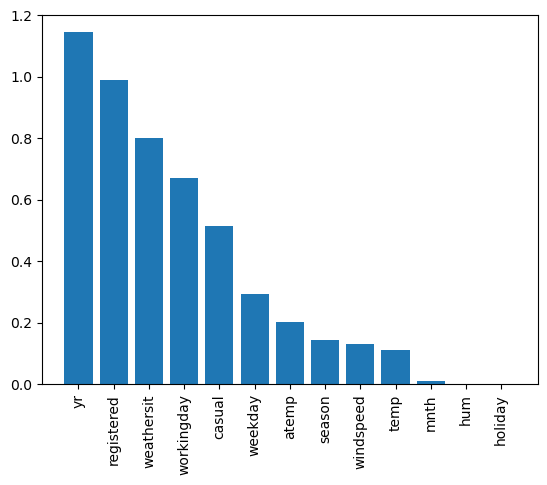

In [19]:
plt.xticks(rotation = 90)
plt.bar(col_names,ig_valis)

In [20]:
df3 = df[[ 'workingday', 'yr', 'weathersit',  'season', 'cnt']]
df3.head()

,workingday,yr,weathersit,season,cnt
0,1,0,2,1,985
1,1,0,2,1,801
2,1,0,1,1,1349
3,1,0,1,1,1562
4,1,0,1,1,1600


In [21]:
weather_dum = pd.get_dummies(df3['weathersit'], drop_first=True, prefix = 'Weather').astype(int)

In [22]:
weather_dum

,Weather_2,Weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [23]:
#2. Remove the original column
df3 = df3.drop('weathersit',axis=1)

In [24]:
#3. Append the dummy column(s) to the dataset
df3 = pd.concat([df3,weather_dum],axis=1)

In [25]:
# 4. splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df3.drop("cnt",axis=1),df3.cnt, test_size=0.2)

In [26]:
# 5. add the constant term
x_train = sm.add_constant(x_train,prepend=False)

In [27]:
# 6. create the term
mod3 = sm.OLS(y_train,x_train).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.17e-105
Time:                        14:59:19   Log-Likelihood:                -5003.9
No. Observations:                 584   AIC:                         1.002e+04
Df Residuals:                     578   BIC:                         1.005e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
workingday    12.1338    116.182      0.104      0.9

In [28]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [29]:
categorical_data = ['season', 'yr', 'holiday', 'workingday', 'weathersit']
data_clean = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
data_all = pd.get_dummies(data_clean, columns=categorical_data, drop_first=True).astype(int)

In [30]:
data_all

,mnth,weekday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,holiday_1,workingday_1,weathersit_2,weathersit_3
0,1,1,14,18,80,10,985,0,0,0,0,0,1,1,0
1,1,2,14,17,69,16,801,0,0,0,0,0,1,1,0
2,1,3,8,9,43,16,1349,0,0,0,0,0,1,0,0
3,1,4,8,10,59,10,1562,0,0,0,0,0,1,0,0
4,1,5,9,11,43,12,1600,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,12,5,10,11,65,23,2114,0,0,0,1,0,1,1,0
726,12,6,10,12,59,10,3095,0,0,0,1,0,0,1,0
727,12,0,10,12,75,8,1341,0,0,0,1,0,0,1,0
728,12,1,10,11,48,23,1796,0,0,0,1,0,1,0,0


In [31]:
features = data_all[["temp","atemp","hum","windspeed"]]
response = data_all['cnt']
x_train, x_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=20)
x_train = sm.add_constant(x_train, prepend=False)
model = sm.OLS(y_train, x_train).fit()

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           4.39e-79
Time:                        14:59:19   Log-Likelihood:                -5062.6
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     579   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        -114.1526     84.305     -1.354      0.1

1. 

In [34]:
x_test=sm.add_constant(x_test,prepend=False)
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.37028474914494103


In [36]:
for i in range(data_clean.shape[1]):
    print("Column ",i," which is ",data_clean.columns[i],'VIF factor -->',variance_inflation_factor(data_clean.values,i))

Column  0  which is  season VIF factor --> 24.08266261592202
Column  1  which is  yr VIF factor --> 4.765384346095311
Column  2  which is  mnth VIF factor --> 15.357664998151982
Column  3  which is  holiday VIF factor --> 1.11716516167398
Column  4  which is  weekday VIF factor --> 3.154601379977288
Column  5  which is  workingday VIF factor --> 3.4327253474306554
Column  6  which is  weathersit VIF factor --> 14.233928877042667
Column  7  which is  temp VIF factor --> 497.5759802579518
Column  8  which is  atemp VIF factor --> 577.9024782574918
Column  9  which is  hum VIF factor --> 29.35721108513648
Column  10  which is  windspeed VIF factor --> 5.309322864343508
Column  11  which is  cnt VIF factor --> 29.291285173324


**Columns having VIF value greater than 20**

- season
- temp
- atemp
- hum
- cnt

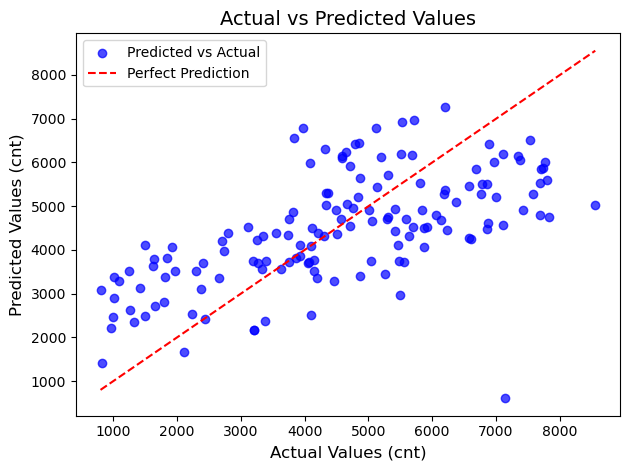

In [75]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values (cnt)', fontsize=12)
plt.ylabel('Predicted Values (cnt)', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)

plt.legend()
plt.tight_layout()

Hence , above graph shows the predicted and actual values are more clustered to the best-fit line
The above graph is generalized and my model is 

Sales are highest in Season 4 (fall), followed by
Season 2 (spring) and Season 3 (summer),
with winter having the lowest sales.

So if us gov can give some specialized discount during the season of spring and summer ,
their bike rental sales may increase.